In [1]:
!date

Wed May 31 16:25:06 EDT 2023


In [2]:
pwd

'/mmfs1/data/aglinska/BC-actionpred-seg'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import random

In [4]:
# outputs_outputs_test_orig = pickle.load(open('./Data/outputs_outputs_test_orig.pickle','rb'))
# outputs_outputs_test_bg = pickle.load(open('./Data/outputs_outputs_test_bg.pickle','rb'))
# outputs_outputs_test_seg = pickle.load(open('./Data/outputs_outputs_test_seg.pickle','rb'))

outputs_outputs_test_orig = pickle.load(open('./Data/outputs_outputs_test_orig_GPU.pickle','rb'))
outputs_outputs_test_bg = pickle.load(open('./Data/outputs_outputs_test_bg_GPU.pickle','rb'))
outputs_outputs_test_seg = pickle.load(open('./Data/outputs_outputs_test_seg_GPU.pickle','rb'))

outputs_outputs_val_orig = pickle.load(open('./Data/outputs_outputs_val_orig.pickle','rb'))
outputs_outputs_val_bg = pickle.load(open('./Data/outputs_outputs_val_bg.pickle','rb'))
outputs_outputs_val_seg = pickle.load(open('./Data/outputs_outputs_val_seg.pickle','rb'))

In [5]:
print(outputs_outputs_test_orig[0][0][0:5])
print(outputs_outputs_val_orig[0][0][0:5])

[4.00e-03 0.00e+00 0.00e+00 1.31e-05 0.00e+00]
[5.325e-03 5.975e-04 3.320e-05 7.809e-03 3.405e-04]


In [6]:
nc = len(outputs_outputs_test_orig)
nf = [len(i) for i in outputs_outputs_test_orig]

In [7]:
print(f'{nc} {min(nf)}-{max(nf)}')

121 10-302


### 80 Categories

In [8]:
val_acc = np.array([(np.array(outputs_outputs_val_orig[c]).argmax(axis=1)==c).mean() for c in range(nc)])

In [9]:
print(sum(val_acc==1))
print(sum(val_acc>0))

3
22


In [12]:
val_diff = [(np.array(outputs_outputs_val_orig[c])[:,c]-np.array(outputs_outputs_val_orig[c]).max(axis=1)).mean() for c in range(nc)]
val_diff  = np.array(val_diff)

In [13]:
I = np.argsort(val_diff)[::-1]

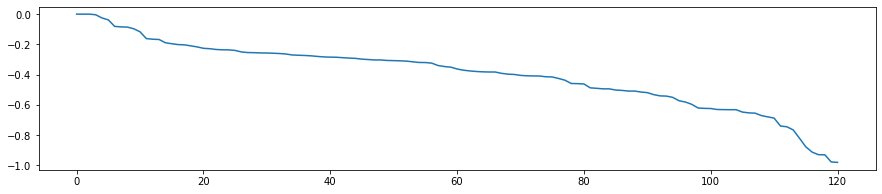

In [14]:
plt.figure(figsize=(15,3))
plt.plot(val_diff[I])

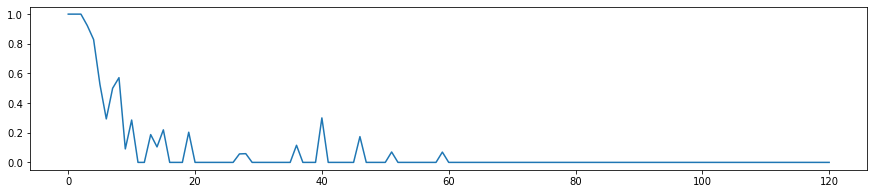

In [15]:
plt.figure(figsize=(15,3))
plt.plot(val_acc[I])

In [16]:
print(val_diff[I][0:10].round(3))
print(val_acc[I][0:10].round(3))

[ 0.     0.     0.    -0.004 -0.025 -0.038 -0.081 -0.084 -0.086 -0.096]
[1.    1.    1.    0.923 0.829 0.525 0.293 0.5   0.571 0.091]


In [25]:
categories = np.load('categories_121.npy')
print(categories.shape)
categories80 = categories[I[0:80]]
print(categories80.shape)
#categories80 = categories[I[0:20]]
#categories80 = categories[I[-20::]]
#categories80 = categories[I[-10::]]

(121,)
(80,)


In [28]:
print(categories80[0:3])
print(categories80[-3::])

['golf_part' 'using_lawn_mower' 'using_scythe']
['fish-hunting_hold' 'pouring_wine' 'play_cymbals']


### ACC choose from 121

In [32]:
acc_orig = np.array([(np.array(outputs_outputs_test_orig[c]).argmax(axis=1)==c).mean() for c in range(nc)])
acc_bg = np.array([(np.array(outputs_outputs_test_bg[c]).argmax(axis=1)==c).mean() for c in range(nc)])
acc_seg = np.array([(np.array(outputs_outputs_test_seg[c]).argmax(axis=1)==c).mean() for c in range(nc)])

In [33]:
np.corrcoef(val_acc,acc_orig)[0,1]

0.25302403123285755

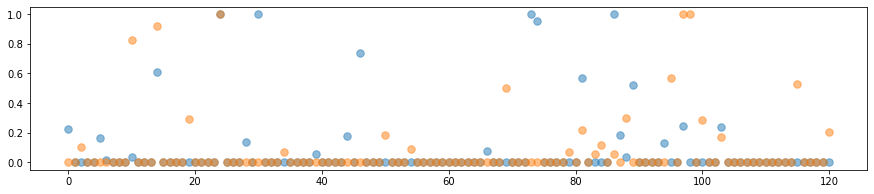

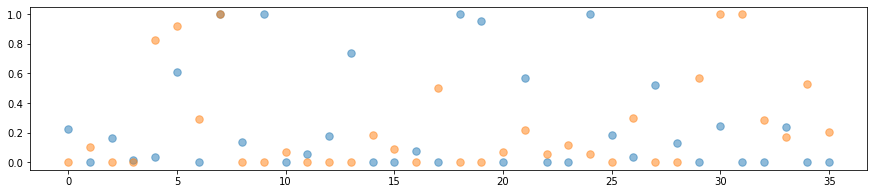

In [34]:
plt.figure(figsize=(15,3))
plt.plot(acc_orig,'.',markersize=15,alpha=.5)
plt.plot(val_acc,'.',markersize=15,alpha=.5)

plt.figure(figsize=(15,3))
plt.plot(acc_orig[(acc_orig>0)+(val_acc>0)],'.',markersize=15,alpha=.5)
plt.plot(val_acc[(acc_orig>0)+(val_acc>0)],'.',markersize=15,alpha=.5)

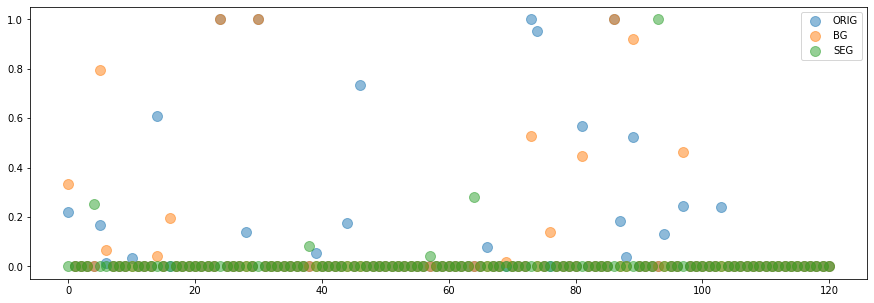

In [35]:
plt.figure(figsize=(15,5))
plt.plot(acc_orig,'.',alpha=.5,markersize=20)
plt.plot(acc_bg,'.',alpha=.5,markersize=20)
plt.plot(acc_seg,'.',alpha=.5,markersize=20)
plt.legend(['ORIG','BG','SEG'])

Text(0, 0.5, 'acc (chance subtracted)')

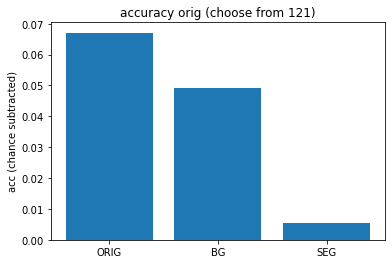

In [36]:
ys = [acc_orig.mean(),acc_bg.mean(),acc_seg.mean()]
ys = np.array(ys)
ys = ys-1/121
xs = [0,1,2]
plt.bar(xs,ys);
plt.xticks(xs,labels=['ORIG','BG','SEG']);
plt.title('accuracy orig (choose from 121)')
plt.ylabel('acc (chance subtracted)')

### ACC choose from 5

In [37]:
answer_foils = np.array([random.sample(population=list(np.arange(nc)[np.arange(nc)!=c]),k=4) for c in range(nc)])

In [38]:
answer_true = np.arange(nc)[:,np.newaxis]

In [39]:
answer_choices = np.hstack((answer_true,answer_foils))

In [40]:
choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(nc)]
choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(nc)]
choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(nc)]

choose_5_acc_orig = np.array(choose_5_acc_orig)
choose_5_acc_bg = np.array(choose_5_acc_bg)
choose_5_acc_seg = np.array(choose_5_acc_seg)

Text(0, 0.5, 'acc (chance subtracted)')

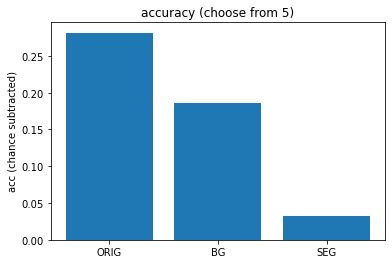

In [41]:
ys = [choose_5_acc_orig.mean(),choose_5_acc_bg.mean(),choose_5_acc_seg.mean()]
ys = np.array(ys)
ys = ys-1/answer_choices.shape[1]
xs = [0,1,2]
plt.bar(xs,ys);
plt.xticks(xs,labels=['ORIG','BG','SEG']);
plt.title('accuracy (choose from 5)')
plt.ylabel('acc (chance subtracted)')

### Choose from 5, 80 top categories

In [51]:
categories.shape

(121,)

In [52]:
categories80_idx = [np.argwhere(val==categories)[0][0] for val in categories80]
categories80_idx = np.array(categories80_idx)
categories80_idx

array([ 24,  97,  98,  14,  10, 115,  19,  69,  95,  54, 100,  74,  75,
        50,   2,  81,  67, 113,  56, 120, 102,  23,   4,  43,  18,   0,
       101,  83,  86,  65,  16,  59,  72, 105,  31,  63,  84, 116,  29,
        35,  88,  58,  60,  80,   8,   6, 103,  89,  90, 104,   5,  34,
        37,  32, 118,  48,  39,  44,  25,  79,  20,  62,  55, 108,  73,
        46,  51,  26,  42,  38,  17, 106,  22,  57,  78,  53, 119,  21,
        68,  40])

In [90]:
#answer_foils = np.array([random.sample(population=list(np.arange(nc)[np.arange(nc)!=c]),k=4) for c in range(nc)])
#answer_foils = np.array([random.sample(population=list(categories80_idx[categories80_idx!=c]),k=4) for c in categories80_idx])
answer_foils = np.array([random.sample(population=list(categories80_idx[categories80_idx!=c]),k=4) for c in range(nc)])

In [91]:
answer_true = np.arange(nc)[:,np.newaxis]
#answer_true = categories80_idx[:,np.newaxis]

In [92]:
answer_choices = np.hstack((answer_true,answer_foils))
print(answer_choices[0:3,:])

[[  0  88  54  68  72]
 [  1 103  50 100  79]
 [  2  58  16  21 101]]


In [93]:

choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]

# choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(answer_choices.shape[0])]
# choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(answer_choices.shape[0])]
# choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in range(answer_choices.shape[0])]

choose_5_acc_orig = np.array(choose_5_acc_orig)
choose_5_acc_bg = np.array(choose_5_acc_bg)
choose_5_acc_seg = np.array(choose_5_acc_seg)



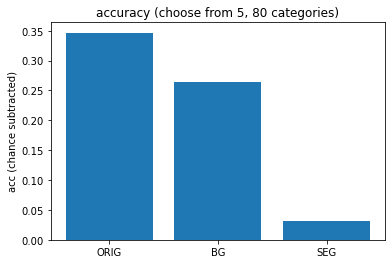

In [106]:
ys = [choose_5_acc_orig.mean(),choose_5_acc_bg.mean(),choose_5_acc_seg.mean()]
ys = np.array(ys)
ys = ys-1/answer_choices.shape[1]
xs = [0,1,2]
plt.bar(xs,ys);
plt.xticks(xs,labels=['ORIG','BG','SEG']);
plt.title('accuracy (choose from 5, 80 categories)')
plt.ylabel('acc (chance subtracted)')
plt.savefig('./Results/mTurk_dnn_comp.png')

In [95]:
df = pd.DataFrame(columns=['action','cat_idx','file','code','label','choice_idx_1','choice_idx_2','choice_idx_3','choice_idx_4','choice_idx_5','choice_label_1','choice_label_2','choice_label_3','choice_label_4','choice_label_5'])
df[['choice_idx_1','choice_idx_2','choice_idx_3','choice_idx_4','choice_idx_5']] = answer_choices[categories80_idx,:]
df['cat_idx'] = answer_choices[categories80_idx,0]
df['action'] = categories[categories80_idx]
df['label'] = df['action'].copy()
df['label'] = [val.replace('_',' ') for val in df['label'].values]
df['label'].values[df['label'].values=='hand-drill firemaking drill with bow'] = 'firemaking drill with bow'

In [96]:
df[['choice_label_1','choice_label_2','choice_label_3','choice_label_4','choice_label_5']] = categories[answer_choices[categories80_idx,:]]
for key in ['choice_label_1','choice_label_2','choice_label_3','choice_label_4','choice_label_5']:
    df[key] = [df['label'].values[df['action'].values==val][0] for val in df[key].values]

In [107]:
df.to_csv('./Results/mTurk_masterfile.csv')

In [99]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [100]:
df

,action,cat_idx,file,code,label,choice_idx_1,choice_idx_2,choice_idx_3,choice_idx_4,choice_idx_5,choice_label_1,choice_label_2,choice_label_3,choice_label_4,choice_label_5
0,golf_part,24,NaN,NaN,golf part,24,40,20,34,4,golf part,play cymbals,eat apple,jack up car,balloon animal
1,using_lawn_mower,97,NaN,NaN,using lawn mower,97,32,23,69,40,using lawn mower,handshake dog,floss dance,pull ups,play cymbals
2,using_scythe,98,NaN,NaN,using scythe,98,23,31,103,113,using scythe,floss dance,handsaw,wear face mask,yoga firefly
3,closing_door,14,NaN,NaN,closing door,14,58,84,5,34,closing door,play serpent,softball pitch,basketball jabstep,jack up car
4,chainsaw_tree,10,NaN,NaN,chainsaw tree,10,18,19,60,17,chainsaw tree,dog highfive,draw handgun,play tambourine,dips
5,yoga_gate,115,NaN,NaN,yoga gate,115,44,84,16,56,yoga gate,play grandpiano,softball pitch,cutting onion,play sanxian
6,draw_handgun,19,NaN,NaN,draw handgun,19,14,37,97,105,draw handgun,closing door,neck side pull stretch,using lawn mower,weightlifting stand
7,pull_ups,69,NaN,NaN,pull ups,69,46,62,44,42,pull ups,play hulusi,play triangle,play grandpiano,play erhu
8,tight-rope_walking,95,NaN,NaN,tight-rope walking,95,14,60,35,20,tight-rope walking,closing door,play tambourine,jump rope,eat apple
9,play_panpipe,54,NaN,NaN,play panpipe,54,78,81,53,21,play panpipe,shooting shotgun,skateboard forward,play ocarina,fish-hunting hold


Text(0, 0.5, 'acc (chance subtracted)')

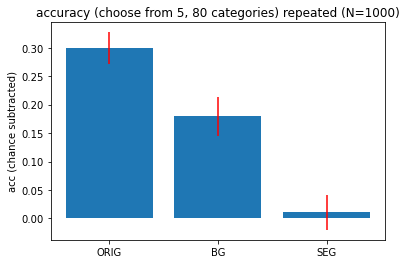

In [101]:
def sample_top_5_acc():
    
    #answer_foils = np.array([random.sample(population=list(np.arange(nc)[np.arange(nc)!=c]),k=4) for c in range(nc)])
    answer_foils = np.array([random.sample(population=list(categories80_idx[categories80_idx!=c]),k=4) for c in range(nc)])
    answer_true = np.arange(nc)[:,np.newaxis]
    answer_choices = np.hstack((answer_true,answer_foils))

    choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
    choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
    choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]

    choose_5_acc_orig = np.array(choose_5_acc_orig)
    choose_5_acc_bg = np.array(choose_5_acc_bg)
    choose_5_acc_seg = np.array(choose_5_acc_seg)

    ys = [choose_5_acc_orig.mean(),choose_5_acc_bg.mean(),choose_5_acc_seg.mean()]
    ys = np.array(ys)
    ys = ys-1/answer_choices.shape[1]

    return ys

sample_data = np.array([sample_top_5_acc() for _ in range(100)])

ys = sample_data.mean(axis=0)
se = sample_data.std(axis=0)
xs = [0,1,2]

plt.bar(xs,ys)
plt.errorbar(xs,ys,se,fmt='r ')
plt.xticks(xs,labels=['ORIG','BG','SEG']);
plt.title('accuracy (choose from 5, 80 categories) repeated (N=1000)')
plt.ylabel('acc (chance subtracted)')

In [102]:
# answer_foils = np.array([random.sample(population=list(np.arange(nc)[np.arange(nc)!=c]),k=4) for c in range(nc)])
# answer_true = np.arange(nc)[:,np.newaxis]
# answer_choices = np.hstack((answer_true,answer_foils))

# choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
# choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
# choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]

# choose_5_acc_orig = np.array(choose_5_acc_orig)
# choose_5_acc_bg = np.array(choose_5_acc_bg)
# choose_5_acc_seg = np.array(choose_5_acc_seg)

# ys = [choose_5_acc_orig.mean(),choose_5_acc_bg.mean(),choose_5_acc_seg.mean()]
# ys = np.array(ys)
# ys = ys-1/answer_choices.shape[1]
                               
# xs = [0,1,2]

# plt.bar(xs,ys)
# #plt.errorbar(xs,ys,se,fmt='r ')
# plt.xticks(xs,labels=['ORIG','BG','SEG']);
# plt.title('accuracy (choose from 5, 80 categories) repeated (N=1000)')
# plt.ylabel('acc (chance subtracted)')

In [104]:
# #answer_foils = np.array([random.sample(population=list(np.arange(nc)[np.arange(nc)!=c]),k=4) for c in range(nc)])
# answer_foils = np.array([random.sample(population=list(categories80_idx[categories80_idx!=c]),k=4) for c in range(nc)])
# answer_true = np.arange(nc)[:,np.newaxis]
# answer_foils = np.hstack((answer_true,answer_foils))

# choose_5_acc_orig = [(np.array(outputs_outputs_test_orig[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
# choose_5_acc_bg = [(np.array(outputs_outputs_test_bg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]
# choose_5_acc_seg = [(np.array(outputs_outputs_test_seg[c])[:,answer_choices[c,:]].argmax(axis=1)==0).mean() for c in categories80_idx]

# choose_5_acc_orig = np.array(choose_5_acc_orig)
# choose_5_acc_bg = np.array(choose_5_acc_bg)
# choose_5_acc_seg = np.array(choose_5_acc_seg)

# ys = [choose_5_acc_orig.mean(),choose_5_acc_bg.mean(),choose_5_acc_seg.mean()]
# ys = np.array(ys)
# ys = ys-1/answer_choices.shape[1]
                               
# xs = [0,1,2]

# plt.bar(xs,ys)
# #plt.errorbar(xs,ys,se,fmt='r ')
# plt.xticks(xs,labels=['ORIG','BG','SEG']);
# plt.title('accuracy (choose from 5, 80 categories) repeated (N=1000)')
# plt.ylabel('acc (chance subtracted)')

In [79]:
#all([i in categories80_idx for i in answer_foils.flatten()])

In [105]:
# answer_choices